<a href="https://colab.research.google.com/github/ShrinithyMeera/Image-Classification/blob/main/Shrinithy_126156142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Classification_task

In [95]:
column_names = ['Character', 'Universe', 'Strength', 'Speed', 'Intelligence', 'Special Abilities', 'Weaknesses', 'Battle Outcome']
data=pd.read_csv("/content/characters_dataset.csv",header=None,names=column_names)
print(data.head())

      Character   Universe Strength Speed  Intelligence Special Abilities  \
0  Wonder Woman     Marvel        7     8           3.0       Telekinesis   
1      Iron Man     Marvel        4     7           9.0       Telekinesis   
2      Iron Man  DC Comics        8     7           5.0       Telekinesis   
3    Spider-Man  DC Comics        5     6          10.0       Telekinesis   
4         Flash     Marvel        7     6           2.0      Invisibility   

   Weaknesses  Battle Outcome  
0  Kryptonite             0.0  
1  Kryptonite             0.0  
2       Magic             0.0  
3  Kryptonite             0.0  
4       Magic             0.0  


In [11]:
data.isnull().sum()

Character             2
Universe             13
Strength             11
Speed                11
Intelligence          4
Special Abilities    14
Weaknesses            8
Battle Outcome        1
dtype: int64

In [12]:
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

Character : ['Wonder Woman' 'Iron Man' 'Spider-Man' 'Flash' 'Thor' 'Batman' 'Superman'
 'Captain America' nan]
Universe : ['Marvel' 'DC Comics' nan '1234']
Strength : ['7' '4' '8' '5' nan '3' '6' '2' '1' '10' '9' 'value' 'values']
Speed : ['8' '7' '6' '9' '2' '5' '4' '3' nan '1' '10' 'value']
Intelligence : [ 3.  9.  5. 10.  2.  7.  4.  1.  6. nan  8.]
Special Abilities : ['Telekinesis' 'Invisibility' 'Super Strength' 'Flight' nan '0']
Weaknesses : ['Kryptonite' 'Magic' 'Wooden Stake' 'Silver' nan]
Battle Outcome : [ 0.  1. nan]


In [13]:
#replacing unknown values as not avaiable data
import numpy as np
for col in data.columns:
  data[col].replace({'value':np.nan},inplace=True)
  data[col].replace({'values':np.nan},inplace=True)
data["Special Abilities"].replace({'0':np.nan},inplace=True)
data.isnull().sum()

Character             2
Universe             13
Strength             14
Speed                12
Intelligence          4
Special Abilities    15
Weaknesses            8
Battle Outcome        1
dtype: int64

In [16]:
#missing data percentage
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
print(missing_percentage)

Character            0.000000
Universe             0.000000
Strength             2.805611
Speed                2.404810
Intelligence         0.801603
Special Abilities    0.000000
Weaknesses           0.000000
Battle Outcome       0.200401
dtype: float64


In [96]:
#encoding categorical data
col_name=['Character','Universe',"Special Abilities","Weaknesses"]
label_mappings = {}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in col_name:
  data[col] = le.fit_transform(data[col])
  label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mappings)
print(data.head())
data[col]

object_columns = data.select_dtypes(include=['object']).columns

# Convert these columns to numeric
for col in object_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # `errors='coerce'` will turn invalid parsing into NaN



{'Character': {'Batman': 0, 'Captain America': 1, 'Flash': 2, 'Iron Man': 3, 'Spider-Man': 4, 'Superman': 5, 'Thor': 6, 'Wonder Woman': 7, nan: 8}, 'Universe': {'1234': 0, 'DC Comics': 1, 'Marvel': 2, nan: 3}, 'Special Abilities': {'0': 0, 'Flight': 1, 'Invisibility': 2, 'Super Strength': 3, 'Telekinesis': 4, nan: 5}, 'Weaknesses': {'Kryptonite': 0, 'Magic': 1, 'Silver': 2, 'Wooden Stake': 3, nan: 4}}
   Character  Universe Strength Speed  Intelligence  Special Abilities  \
0          7         2        7     8           3.0                  4   
1          3         2        4     7           9.0                  4   
2          3         1        8     7           5.0                  4   
3          4         1        5     6          10.0                  4   
4          2         2        7     6           2.0                  2   

   Weaknesses  Battle Outcome  
0           0             0.0  
1           0             0.0  
2           1             0.0  
3           0         

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Character          499 non-null    int64  
 1   Universe           499 non-null    int64  
 2   Strength           485 non-null    float64
 3   Speed              487 non-null    float64
 4   Intelligence       495 non-null    float64
 5   Special Abilities  499 non-null    int64  
 6   Weaknesses         499 non-null    int64  
 7   Battle Outcome     498 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [53]:
#Splitting of data as features and target variable
X=data.iloc[:,0:7]
X_df=X
y=data.iloc[:,7]

In [55]:
y.fillna(y.mode()[0], inplace=True)
print(y.head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Battle Outcome, dtype: float64


#Data Visualization

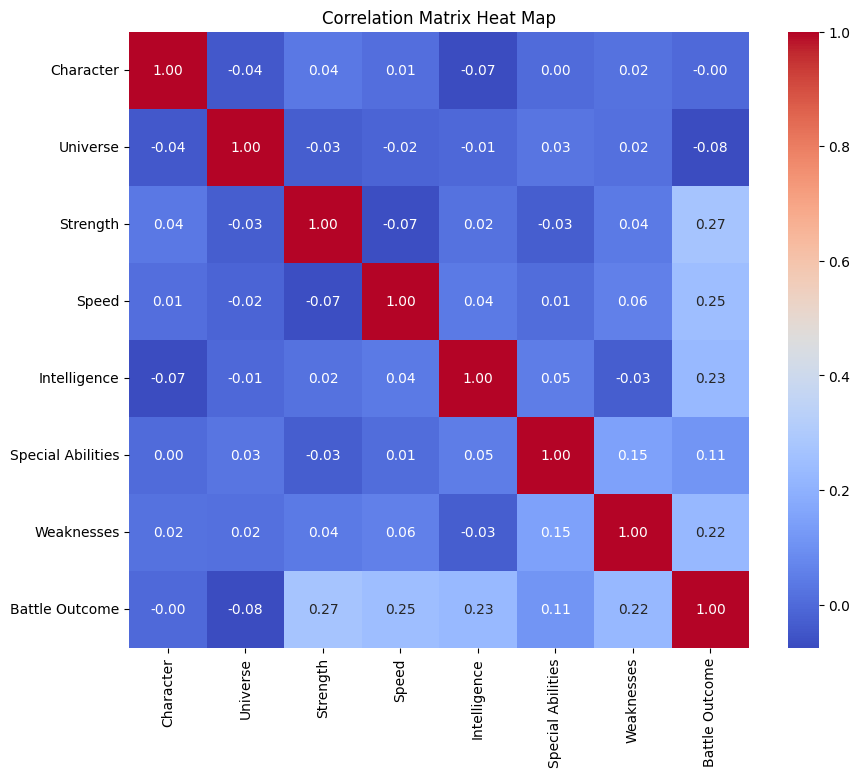

In [56]:
corr_matrix = data.corr()

# Plot heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=data.columns, yticklabels=data.columns)
plt.title('Correlation Matrix Heat Map')
plt.show()


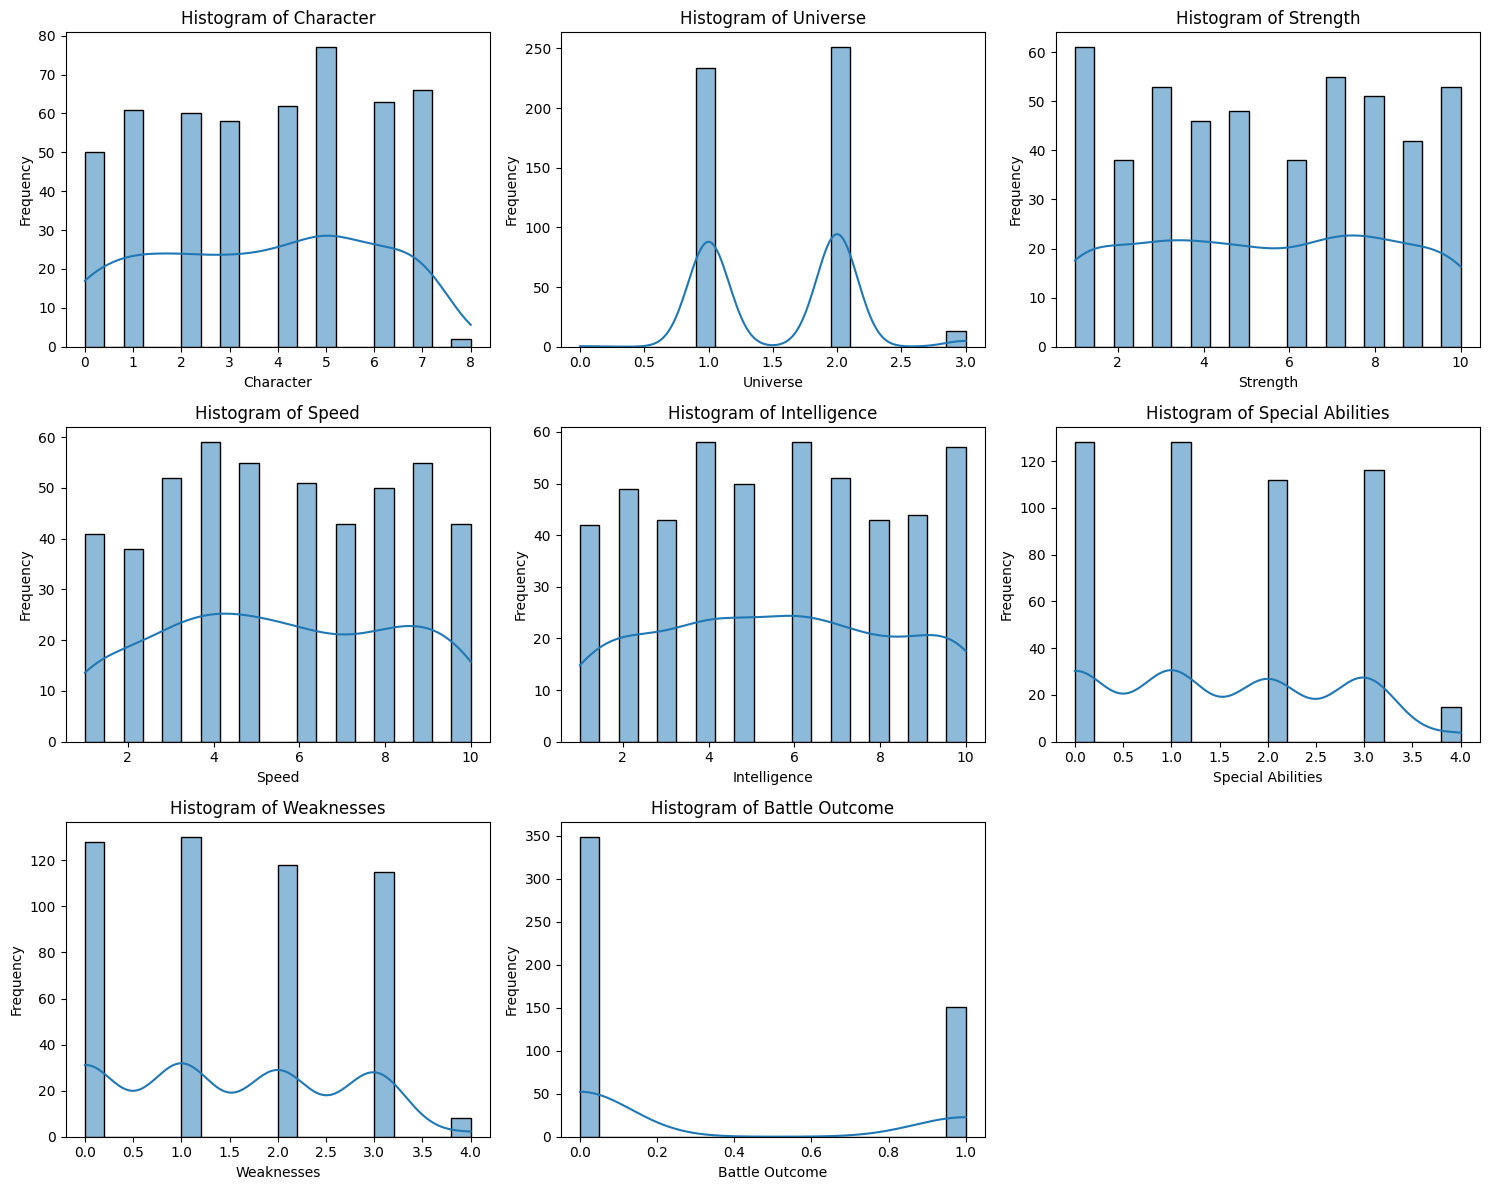

In [57]:
#Histogram with kde
feat_count= len(data.columns)
row_count = (feat_count // 3) + (feat_count % 3 > 0)
plt.figure(figsize=(15, row_count * 4))
label=[]

for i, column in enumerate(data.columns):
    plt.subplot(row_count, 3, i + 1)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#Train

In [58]:
#nan values filling
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
scaler=StandardScaler()
X=scaler.fit_transform(X)
imputer=KNNImputer(n_neighbors=10)
X=imputer.fit_transform(X)
X_imp=pd.DataFrame(X,columns=X_df.columns)
print("Imputed DATA")
print(X_imp.head())

Imputed DATA
   Character  Universe  Strength     Speed  Intelligence  Special Abilities  \
0   1.460211  0.811473  0.523528  0.875413     -0.916119           1.244797   
1  -0.307273  0.811473 -0.497562  0.514120      1.207904           1.244797   
2  -0.307273 -1.004334  0.863892  0.514120     -0.208111           1.244797   
3   0.134598 -1.004334 -0.157199  0.152826      1.561908           1.244797   
4  -0.749144  0.811473  0.523528  0.152826     -1.270123          -0.440831   

   Weaknesses  
0   -1.295980  
1   -1.295980  
2   -0.425598  
3   -1.295980  
4   -0.425598  


In [29]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42)

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)
X_traint=torch.tensor(X_train,dtype=torch.float32)
Y_traint=torch.tensor(y_train,dtype=torch.float32)
X_testt=torch.tensor(X_test,dtype=torch.float32)
Y_testt=torch.tensor(y_test,dtype=torch.float32)


In [81]:
train_data=TensorDataset(X_traint,Y_traint)
test_data=TensorDataset(X_testt,Y_testt)
train_loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(test_data,batch_size=32,shuffle=False)

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(399, 7)
(399, 1)
(100, 7)
(100, 1)


In [83]:
#NN def
#NN
class BCmodel(nn.Module):
  def __init__(self):
    super(BCmodel,self).__init__()
    self.layer1=nn.Linear(7,16)
    self.layer2=nn.Linear(16,32)
    self.layer3=nn.Linear(32,16)
    self.output=nn.Linear(16,1)
    self.relu=nn.ReLU()
    self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    x=self.relu(self.layer1(x))
    x=self.relu(self.layer2(x))
    x=self.relu(self.layer3(x))
    x=self.sigmoid(self.output(x))
    return x

In [84]:
model=BCmodel()

In [85]:
#Loss and Optimizer
loss_fn=nn.BCELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [86]:
#Model Training
epochs=300
for epoch in range(epochs):
  model.train()
  for input,labels in train_loader:
    optimizer.zero_grad()
    output =  model(input).squeeze()
    labels = labels.squeeze()
    loss=loss_fn(output,labels)
    loss.backward()
    optimizer.step()

  print(f"Epoch [{epoch+1}/{epochs}]\nLoss : {loss.item() : .4f}")


Epoch [1/300]
Loss :  0.6978
Epoch [2/300]
Loss :  0.6682
Epoch [3/300]
Loss :  0.5973
Epoch [4/300]
Loss :  0.5007
Epoch [5/300]
Loss :  0.5375
Epoch [6/300]
Loss :  0.4907
Epoch [7/300]
Loss :  0.4550
Epoch [8/300]
Loss :  0.7095
Epoch [9/300]
Loss :  0.4279
Epoch [10/300]
Loss :  0.3264
Epoch [11/300]
Loss :  0.5187
Epoch [12/300]
Loss :  0.8856
Epoch [13/300]
Loss :  0.3282
Epoch [14/300]
Loss :  0.4652
Epoch [15/300]
Loss :  0.4544
Epoch [16/300]
Loss :  0.3860
Epoch [17/300]
Loss :  0.5963
Epoch [18/300]
Loss :  0.5995
Epoch [19/300]
Loss :  0.4948
Epoch [20/300]
Loss :  0.3366
Epoch [21/300]
Loss :  0.5180
Epoch [22/300]
Loss :  0.4386
Epoch [23/300]
Loss :  0.4269
Epoch [24/300]
Loss :  0.6024
Epoch [25/300]
Loss :  0.3682
Epoch [26/300]
Loss :  0.5780
Epoch [27/300]
Loss :  0.3887
Epoch [28/300]
Loss :  0.4218
Epoch [29/300]
Loss :  0.3824
Epoch [30/300]
Loss :  0.4599
Epoch [31/300]
Loss :  0.9243
Epoch [32/300]
Loss :  0.6384
Epoch [33/300]
Loss :  0.8257
Epoch [34/300]
Loss

In [87]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

model.eval()

y_true = []
y_pred = []
y_pred_probs = []


with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs).squeeze()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend((outputs > 0.5).cpu().numpy())
        y_pred_probs.extend(outputs.cpu().numpy())


y_true = np.array(Y_testt)
y_pred = np.array(y_pred)
y_pred_probs = np.array(y_pred_probs)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.72
Precision: 0.5217391304347826
Recall: 0.41379310344827586
F1 Score: 0.4615384615384615
Confusion Matrix:
 [[60 11]
 [17 12]]


In [72]:
joblib.dump(model,"NN_model.pkl")

['NN_model.pkl']

In [114]:
#GNB model
gnb=GaussianNB()
gnb.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [115]:
y_pred = gnb.predict(X_test)
y_true = np.array(Y_testt)
y_pred = np.array(y_pred)
y_pred_probs = np.array(y_pred_probs)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.78
Precision: 0.6666666666666666
Recall: 0.4827586206896552
F1 Score: 0.56
Confusion Matrix:
 [[64  7]
 [15 14]]


In [116]:
joblib.dump(gnb,"gnb.pkl")

['gnb.pkl']

Best model is gnb and the final out come of gnb is considered

In [97]:
print(label_mappings)

{'Character': {'Batman': 0, 'Captain America': 1, 'Flash': 2, 'Iron Man': 3, 'Spider-Man': 4, 'Superman': 5, 'Thor': 6, 'Wonder Woman': 7, nan: 8}, 'Universe': {'1234': 0, 'DC Comics': 1, 'Marvel': 2, nan: 3}, 'Special Abilities': {'0': 0, 'Flight': 1, 'Invisibility': 2, 'Super Strength': 3, 'Telekinesis': 4, nan: 5}, 'Weaknesses': {'Kryptonite': 0, 'Magic': 1, 'Silver': 2, 'Wooden Stake': 3, nan: 4}}


In [117]:
test_data1={"Character" : "Thor", "Universe" :"DC Comics", 'Strength' : 8, 'Speed' : 3, 'Intelligence' : 4,'Special Abilities' : 'Invisibility', 'Weaknesses' : 'Kryptonite'}
test_datas=[]
for col in test_data1:
  if col in label_mappings:
    test_data1[col]=label_mappings[col][test_data1[col]]
test_df1=pd.DataFrame(test_data1,index=[0])
print(test_df1)

   Character  Universe  Strength  Speed  Intelligence  Special Abilities  \
0          6         1         8      3             4                  2   

   Weaknesses  
0           0  


In [118]:
test_data2={"Character" : "Batman", "Universe" :"Marvel", 'Strength' : 4, 'Speed' : 6, 'Intelligence' : 9,'Special Abilities' : 'Telekinesis', 'Weaknesses' : 'Silver'}
test_datas=[]
for col in test_data2:
  if col in label_mappings:
    test_data2[col]=label_mappings[col][test_data2[col]]
test_df2=pd.DataFrame(test_data2,index=[0])
print(test_df2)

   Character  Universe  Strength  Speed  Intelligence  Special Abilities  \
0          0         2         4      6             9                  4   

   Weaknesses  
0           2  


In [119]:
scaler=joblib.load("scaler.pkl")
model=joblib.load("NN_model.pkl")
model_gnb=joblib.load("/content/gnb.pkl")

In [120]:
test_data=[test_df1,test_df2]

In [121]:
test_data_ten=[]
test_data_sca=[]
for test_df in test_data:
  test_data_scaled=scaler.transform(test_df)
  test_data_sca.append(test_data_scaled)
  test_data_tensor=torch.tensor(test_data_scaled,dtype=torch.float32)
  test_data_ten.append(test_data_tensor)

In [122]:
#NN predictions
model.eval()
for test_data_tensor in test_data_ten:
# Make predictions with the PyTorch model
  with torch.no_grad():
      outputs = model(test_data_tensor)
      probabilities_positive = outputs.numpy().flatten()  # Probabilities for positive class (class 1)
      probabilities_negative = 1 - probabilities_positive  # Probabilities for negative class (class 0)
      predictions = (outputs.squeeze() > 0.5).float()  # Assuming binary classification with sigmoid output
  print("Probabilities of the Positive Class:", probabilities_positive)
  print("Probabilities of the Negative Class:", probabilities_negative)
  print("Predictions:", predictions.numpy())


Probabilities of the Positive Class: [6.3419798e-06]
Probabilities of the Negative Class: [0.9999937]
Predictions: 0.0
Probabilities of the Positive Class: [0.14559294]
Probabilities of the Negative Class: [0.8544071]
Predictions: 0.0


In [124]:
#GNB prediction
print("FINAL OUTCOME")
for test_data_scaled in test_data_sca:
  predictions=model_gnb.predict(test_data_scaled)
  probabilities=model_gnb.predict_proba(test_data_scaled)
  print(predictions)
  if predictions==0:
    print("Character 2 Wins")
  else:
    print("Character 1 wins")
  print(probabilities)


FINAL OUTCOME
[0.]
Character 2 Wins
[[0.88187599 0.11812401]]
[0.]
Character 2 Wins
[[0.56909388 0.43090612]]


#Regression task

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
df=pd.read_csv("/content/Gemini_BTCUSD.csv")
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1.690240e+12,24-07-2023 23:00,BTC/USD,29161.82,29199.99,29161.82,29180.00,5.228109,1.525562e+05
1,1.690240e+12,24-07-2023 22:00,BTC/USD,29167.91,29192.63,29139.17,29161.82,37.308398,1.087981e+06
2,1.690230e+12,24-07-2023 21:00,BTC/USD,29149.01,29186.00,29118.20,29167.91,4.429061,1.291864e+05
3,1.690230e+12,24-07-2023 20:00,BTC/USD,29111.09,29154.63,29097.24,29149.01,11.999466,3.497726e+05
4,1.690230e+12,24-07-2023 19:00,BTC/USD,29114.34,29153.00,29098.46,29111.09,17.364420,5.054972e+05


In [127]:
df['symbol'].replace("BTC/USD", 1,inplace=True)
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1.690240e+12,24-07-2023 23:00,1,29161.82,29199.99,29161.82,29180.00,5.228109,1.525562e+05
1,1.690240e+12,24-07-2023 22:00,1,29167.91,29192.63,29139.17,29161.82,37.308398,1.087981e+06
2,1.690230e+12,24-07-2023 21:00,1,29149.01,29186.00,29118.20,29167.91,4.429061,1.291864e+05
3,1.690230e+12,24-07-2023 20:00,1,29111.09,29154.63,29097.24,29149.01,11.999466,3.497726e+05
4,1.690230e+12,24-07-2023 19:00,1,29114.34,29153.00,29098.46,29111.09,17.364420,5.054972e+05


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68312 entries, 0 to 68311
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        68312 non-null  float64
 1   date        68312 non-null  object 
 2   symbol      68312 non-null  int64  
 3   open        68312 non-null  float64
 4   high        68312 non-null  float64
 5   low         68312 non-null  float64
 6   close       68312 non-null  float64
 7   Volume BTC  68312 non-null  float64
 8   Volume USD  68312 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.7+ MB


In [129]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df.set_index('date', inplace=True)

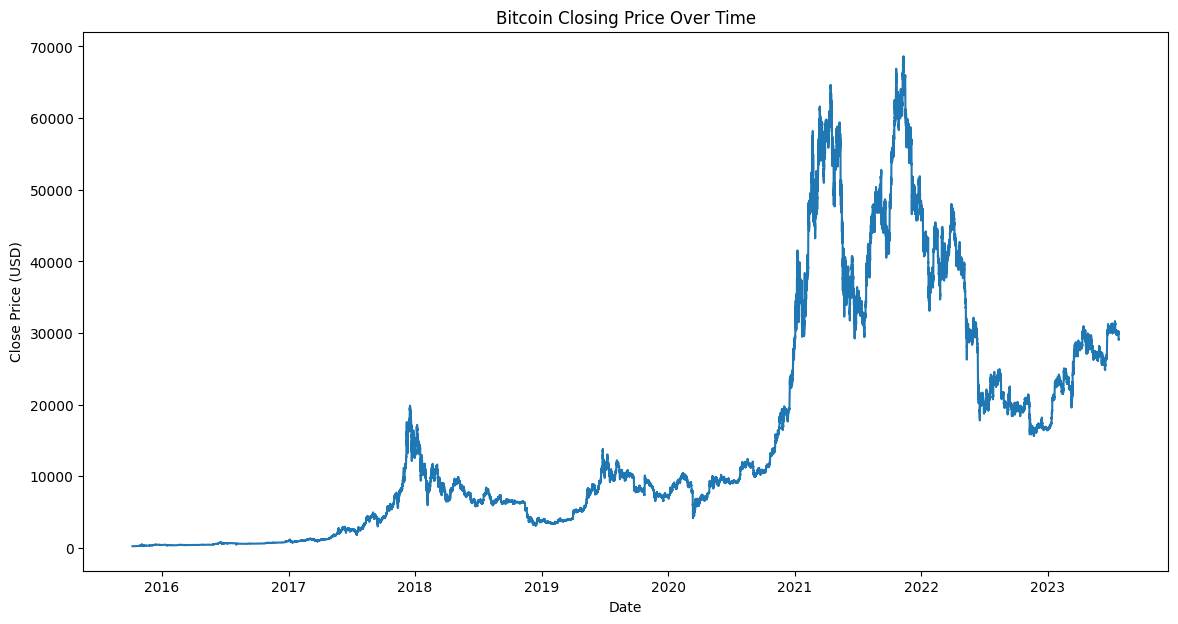

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df['close'])
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

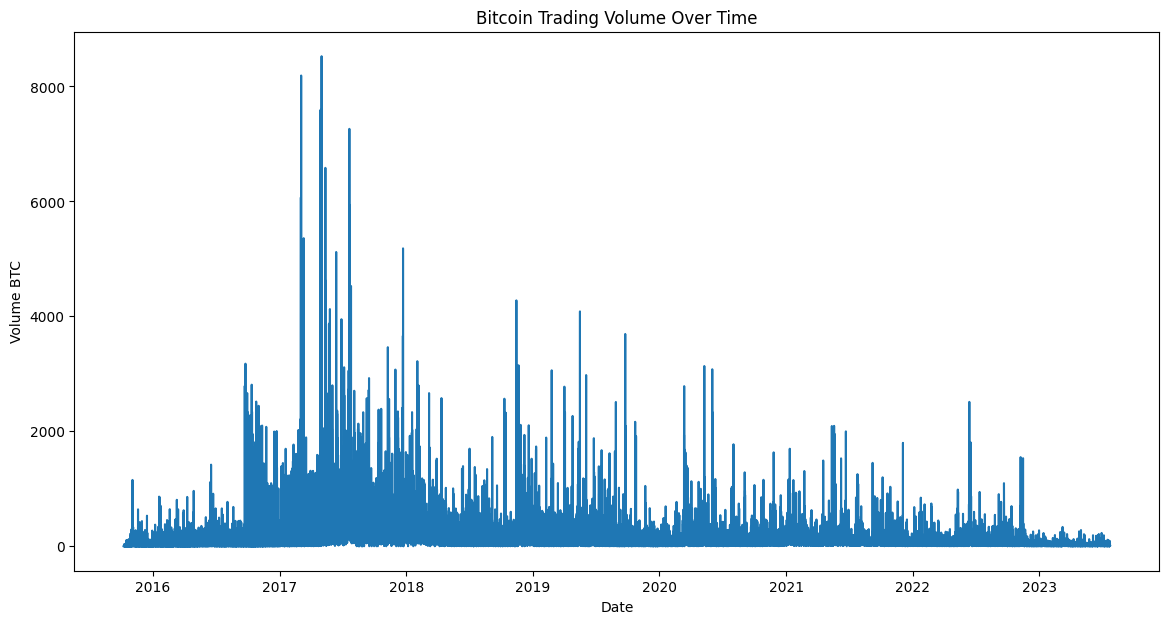

In [132]:
plt.figure(figsize=(14, 7))
plt.plot(df['Volume BTC'])
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume BTC')
plt.show()

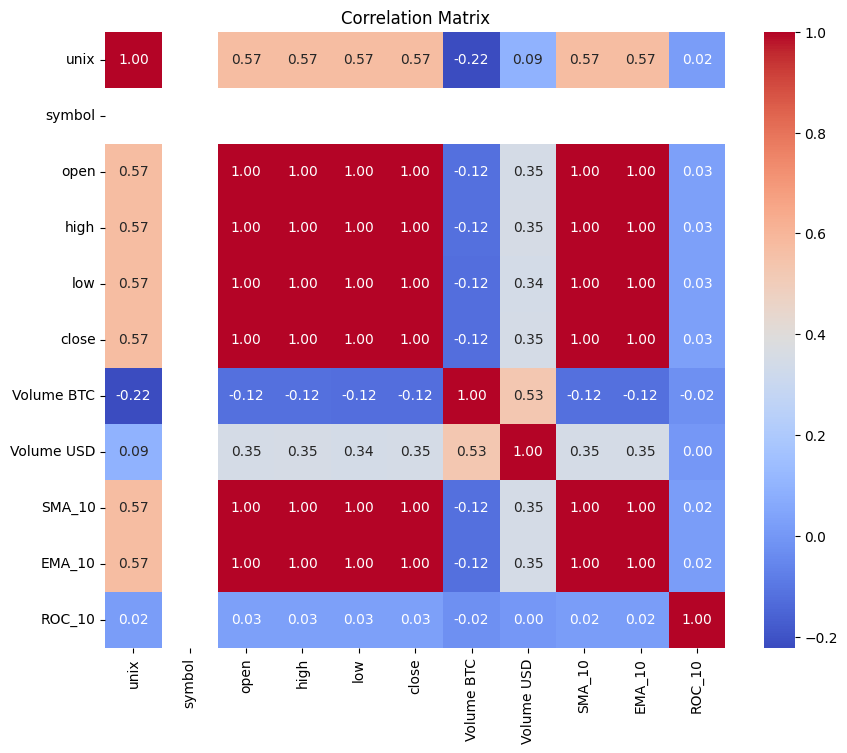

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


features = ['open', 'high', 'low', 'Volume BTC', 'Volume USD']
target = 'close'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
joblib.dump(model,'regression.pkl')



Mean Absolute Error (MAE): 37.67562120317835
Mean Squared Error (MSE): 7688.108788579846
Root Mean Squared Error (RMSE): 87.68186122898992
R-squared (R2): 0.9999704515247235


['regression.pkl']

After Feature Engineering

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

df['SMA_10'] = df['close'].rolling(window=10).mean()
df['EMA_10'] = df['close'].ewm(span=10, adjust=False).mean()
df['ROC_10'] = df['close'].pct_change(periods=10)
features = ['open', 'high', 'low', 'Volume BTC', 'Volume USD','SMA_10',"EMA_10","ROC_10"]
target = 'close'
df.dropna(inplace=True)
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')




Mean Absolute Error (MAE): 36.92252619272287
Mean Squared Error (MSE): 5708.727148915211
Root Mean Squared Error (RMSE): 75.55611920232015
R-squared (R2): 0.9999782311983626
